# Import Packages

In [1]:
%matplotlib inline
# Imports Packages
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import sklearn
import numpy as np
from sklearn import metrics

# Import Data

In [2]:
# Import data
NBE_df = pd.read_excel('ML_Model_Data_2019.xls', sheet_name='Base Model')
NBE_df.head()

,Bridge_Number,Steel_Element,CS1,CS2,CS3,CS4,MAINTENANCE_021,Bridge_Age,ADT_029,DEGREES_SKEW_034,...,hplus_2019,SO4_2019,Cl_2019,totalN_201,NO3_2019,NH4_2019,Na_2019,K_2019,Mg_2019,Ca_2019
0,10029,28,1.000000,0.0,0.000000,0.0,2,56,10000,0,...,0.11837,6.12682,7.79553,2.85422,7.68722,1.43818,4.22655,0.44474,0.58365,1.34667
1,10029,29,0.925926,0.0,0.074074,0.0,2,56,10000,0,...,0.11837,6.12682,7.79553,2.85422,7.68722,1.43818,4.22655,0.44474,0.58365,1.34667
2,10029,107,0.997257,0.0,0.002743,0.0,2,56,10000,0,...,0.11837,6.12682,7.79553,2.85422,7.68722,1.43818,4.22655,0.44474,0.58365,1.34667
3,10029,113,0.973971,0.0,0.026029,0.0,2,56,10000,0,...,0.11837,6.12682,7.79553,2.85422,7.68722,1.43818,4.22655,0.44474,0.58365,1.34667
4,10029,152,0.986301,0.0,0.013699,0.0,2,56,10000,0,...,0.11837,6.12682,7.79553,2.85422,7.68722,1.43818,4.22655,0.44474,0.58365,1.34667


In [3]:
NBE_df.keys()

Index(['Bridge_Number', 'Steel_Element', 'CS1', 'CS2', 'CS3', 'CS4',
       'MAINTENANCE_021', 'Bridge_Age', 'ADT_029', 'DEGREES_SKEW_034',
       'SERVICE_ON_042A', 'SERVICE_UND_042B', 'STRUCTURE_KIND_043A',
       'STRUCTURE_TYPE_043B', 'APPR_KIND_044A', 'APPR_TYPE_044B',
       'DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'SUBSTRUCTURE_COND_060',
       'OPERATING_RATING_064', 'INVENTORY_RATING_066', 'STRUCTURAL_EVAL_067',
       'APPR_ROAD_EVAL_072', 'DECK_STRUCTURE_TYPE_107', 'SURFACE_TYPE_108A',
       'MEMBRANE_TYPE_108B', 'DECK_PROTECTION_108C', 'PERCENT_ADT_TRUCK_109',
       'BRIDGE_CONDITION', 'temp_dp_2m', 'avg_rh_2m', 'temp_a_10m',
       'temp_a_2m', 'temp_a_60c', 'temp_s_2cm', 'ppt_2019', 'hplus_2019',
       'SO4_2019', 'Cl_2019', 'totalN_201', 'NO3_2019', 'NH4_2019', 'Na_2019',
       'K_2019', 'Mg_2019', 'Ca_2019'],
      dtype='object')

In [7]:
# Normalizing Data
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
scale_features = ['MAINTENANCE_021', 'Bridge_Age', 'ADT_029', 'DEGREES_SKEW_034',
       'SERVICE_ON_042A', 'SERVICE_UND_042B', 'STRUCTURE_KIND_043A',
       'STRUCTURE_TYPE_043B', 'APPR_KIND_044A', 'APPR_TYPE_044B',
       'DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'SUBSTRUCTURE_COND_060',
       'OPERATING_RATING_064', 'INVENTORY_RATING_066', 'STRUCTURAL_EVAL_067',
       'APPR_ROAD_EVAL_072', 'DECK_STRUCTURE_TYPE_107', 'SURFACE_TYPE_108A',
       'MEMBRANE_TYPE_108B', 'DECK_PROTECTION_108C', 'PERCENT_ADT_TRUCK_109',
       'BRIDGE_CONDITION', 'temp_dp_2m', 'avg_rh_2m', 'temp_a_10m',
       'temp_a_2m', 'temp_a_60c', 'temp_s_2cm', 'ppt_2019', 'hplus_2019',
       'SO4_2019', 'Cl_2019', 'totalN_201', 'NO3_2019', 'NH4_2019', 'Na_2019',
       'K_2019', 'Mg_2019', 'Ca_2019']
#NBE_element_df [scale_features] = ss.DataFrame(scale_features.fit_transform(NBE_element_df[scale_features]), columns=NBE_element_df[scale_features].columns)
NBE_df.loc[:, scale_features] = ss.fit_transform(NBE_df.loc[:, scale_features])

In [8]:
NBE_df

,Bridge_Number,Steel_Element,CS1,CS2,CS3,CS4,MAINTENANCE_021,Bridge_Age,ADT_029,DEGREES_SKEW_034,...,hplus_2019,SO4_2019,Cl_2019,totalN_201,NO3_2019,NH4_2019,Na_2019,K_2019,Mg_2019,Ca_2019
0,10029,28,1.000000,0.000000,0.000000,0.0,0.033333,0.500000,0.042017,0.000000,...,0.494609,0.532080,0.336143,0.595772,0.710107,0.352807,0.330324,0.073394,0.305766,0.591362
1,10029,29,0.925926,0.000000,0.074074,0.0,0.033333,0.500000,0.042017,0.000000,...,0.494609,0.532080,0.336143,0.595772,0.710107,0.352807,0.330324,0.073394,0.305766,0.591362
2,10029,107,0.997257,0.000000,0.002743,0.0,0.033333,0.500000,0.042017,0.000000,...,0.494609,0.532080,0.336143,0.595772,0.710107,0.352807,0.330324,0.073394,0.305766,0.591362
3,10029,113,0.973971,0.000000,0.026029,0.0,0.033333,0.500000,0.042017,0.000000,...,0.494609,0.532080,0.336143,0.595772,0.710107,0.352807,0.330324,0.073394,0.305766,0.591362
4,10029,152,0.986301,0.000000,0.013699,0.0,0.033333,0.500000,0.042017,0.000000,...,0.494609,0.532080,0.336143,0.595772,0.710107,0.352807,0.330324,0.073394,0.305766,0.591362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,940076,107,0.996779,0.003221,0.000000,0.0,1.000000,0.556604,0.084664,0.212121,...,0.438786,0.615417,0.533072,0.619890,0.522180,0.468548,0.535667,0.337219,0.493132,0.625921
1985,940082,107,0.992216,0.007784,0.000000,0.0,1.000000,0.584906,0.102172,0.212121,...,0.413300,0.636387,0.557461,0.641603,0.511710,0.498427,0.559764,0.373094,0.520069,0.646520
1986,940096,107,1.000000,0.000000,0.000000,0.0,0.000000,0.386792,0.123139,0.212121,...,0.453695,0.603507,0.519186,0.607454,0.528492,0.451291,0.521963,0.316486,0.477740,0.614201
1987,940097,107,1.000000,0.000000,0.000000,0.0,0.000000,0.386792,0.114500,0.212121,...,0.453695,0.603507,0.519186,0.607454,0.528492,0.451291,0.521963,0.316486,0.477740,0.614201


# NBI Feature Selection

In [10]:
#NBI Feature Selection
X = NBE_df.loc[:,['MAINTENANCE_021', 'Bridge_Age', 'ADT_029', 'DEGREES_SKEW_034',
       'SERVICE_ON_042A', 'SERVICE_UND_042B', 'STRUCTURE_KIND_043A',
       'STRUCTURE_TYPE_043B', 'APPR_KIND_044A', 'APPR_TYPE_044B',
       'DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'SUBSTRUCTURE_COND_060',
       'OPERATING_RATING_064', 'INVENTORY_RATING_066', 'STRUCTURAL_EVAL_067',
       'APPR_ROAD_EVAL_072', 'DECK_STRUCTURE_TYPE_107', 'SURFACE_TYPE_108A',
       'MEMBRANE_TYPE_108B', 'DECK_PROTECTION_108C', 'PERCENT_ADT_TRUCK_109',
       'BRIDGE_CONDITION']]
Y = NBE_df.loc[:,['CS1', 'CS2','CS3','CS4']]

# split into train test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# Feature Selection
from sklearn.ensemble import RandomForestRegressor

# define the model
model_rfr = RandomForestRegressor()

# fit the model
model_rfr.fit(X_train, y_train)

# get importance
importance = model_rfr.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
random_forest_regressor_feature_imp = pd.Series(model_rfr.feature_importances_,index=X.columns).sort_values(ascending=False)

Feature: 0, Score: 0.02594
Feature: 1, Score: 0.11590
Feature: 2, Score: 0.31426
Feature: 3, Score: 0.02270
Feature: 4, Score: 0.01515
Feature: 5, Score: 0.02096
Feature: 6, Score: 0.01395
Feature: 7, Score: 0.02697
Feature: 8, Score: 0.01386
Feature: 9, Score: 0.01423
Feature: 10, Score: 0.03375
Feature: 11, Score: 0.05623
Feature: 12, Score: 0.02844
Feature: 13, Score: 0.06551
Feature: 14, Score: 0.08059
Feature: 15, Score: 0.02140
Feature: 16, Score: 0.02299
Feature: 17, Score: 0.01616
Feature: 18, Score: 0.01728
Feature: 19, Score: 0.00015
Feature: 20, Score: 0.00177
Feature: 21, Score: 0.06187
Feature: 22, Score: 0.00993


No handles with labels found to put in legend.


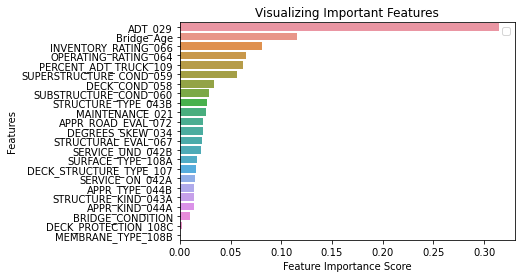

<Figure size 432x288 with 0 Axes>

In [11]:
# Creating a bar plot
sns.barplot(x=random_forest_regressor_feature_imp, y=random_forest_regressor_feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()
# save as png
plt.savefig("figure_NBI_CS4.png")

# Recursive Feature Elimination

In [12]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std

# from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
X = NBE_df.loc[:,['MAINTENANCE_021', 'Bridge_Age', 'ADT_029', 'DEGREES_SKEW_034',
       'SERVICE_ON_042A', 'SERVICE_UND_042B', 'STRUCTURE_KIND_043A',
       'STRUCTURE_TYPE_043B', 'APPR_KIND_044A', 'APPR_TYPE_044B',
       'DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'SUBSTRUCTURE_COND_060',
       'OPERATING_RATING_064', 'INVENTORY_RATING_066', 'STRUCTURAL_EVAL_067',
       'APPR_ROAD_EVAL_072', 'DECK_STRUCTURE_TYPE_107', 'SURFACE_TYPE_108A',
       'MEMBRANE_TYPE_108B', 'DECK_PROTECTION_108C', 'PERCENT_ADT_TRUCK_109',
       'BRIDGE_CONDITION']]
Y = NBE_df.loc[:,['CS1', 'CS2','CS3','CS4']]

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2,23):
        rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=i)
        model = RandomForestRegressor()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

In [13]:
# define RFE
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=5)
# fit RFE
rfe.fit(X_train, y_train)
# summarize all features
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 5.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 8.000
Column: 4, Selected False, Rank: 15.000
Column: 5, Selected False, Rank: 9.000
Column: 6, Selected False, Rank: 14.000
Column: 7, Selected False, Rank: 4.000
Column: 8, Selected False, Rank: 10.000
Column: 9, Selected False, Rank: 16.000
Column: 10, Selected False, Rank: 3.000
Column: 11, Selected False, Rank: 2.000
Column: 12, Selected False, Rank: 6.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected False, Rank: 11.000
Column: 16, Selected False, Rank: 7.000
Column: 17, Selected False, Rank: 12.000
Column: 18, Selected False, Rank: 13.000
Column: 19, Selected False, Rank: 19.000
Column: 20, Selected False, Rank: 18.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected False, Rank: 17.000


Feature Number: 2
>2 -0.125 (0.012)
Feature Number: 3
>3 -0.119 (0.012)
Feature Number: 4
>4 -0.120 (0.013)
Feature Number: 5
>5 -0.120 (0.012)
Feature Number: 6
>6 -0.118 (0.012)
Feature Number: 7
>7 -0.118 (0.012)
Feature Number: 8
>8 -0.117 (0.012)
Feature Number: 9
>9 -0.117 (0.012)
Feature Number: 10
>10 -0.117 (0.013)
Feature Number: 11
>11 -0.117 (0.012)
Feature Number: 12
>12 -0.117 (0.013)
Feature Number: 13
>13 -0.116 (0.013)
Feature Number: 14
>14 -0.116 (0.012)
Feature Number: 15
>15 -0.116 (0.012)
Feature Number: 16
>16 -0.115 (0.012)
Feature Number: 17
>17 -0.115 (0.012)
Feature Number: 18
>18 -0.115 (0.012)
Feature Number: 19
>19 -0.115 (0.012)
Feature Number: 20
>20 -0.115 (0.012)
Feature Number: 21
>21 -0.116 (0.012)
Feature Number: 22
>22 -0.115 (0.012)


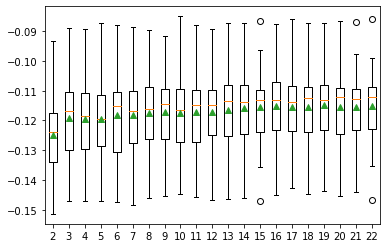

In [38]:
# evaluate a given model using cross-validation
def evaluate_model(model, X_train, y_train):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model,X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return n_scores

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    print('Feature Number:', name)
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()